# Import Necessary Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

# Read Dataset

In [8]:
train_df = pd.read_csv("F:/ETL/Dataset/price_pred/training_set.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test_df = pd.read_csv("F:/ETL/Dataset/price_pred/testing_set.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Preprocessing

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [5]:
train_df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

# Dealing With Null Values and Dealing With Discrete Columns

In [6]:
train_df=train_df.drop(labels=["Id"],axis=1)

### Training Dataset

In [7]:
train_df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [8]:
train_df["Alley"]=train_df["Alley"].fillna("No alley access")

t=train_df["LotFrontage"].mean()
train_df["LotFrontage"]=train_df["LotFrontage"].fillna(t)

train_df["BsmtQual"]=train_df["BsmtQual"].fillna("No Basement")
train_df["BsmtCond"]=train_df["BsmtCond"].fillna("No Basement")
train_df["BsmtExposure"]=train_df["BsmtExposure"].fillna("No Basement")
train_df["BsmtFinType1"]=train_df["BsmtFinType1"].fillna("No Basement")
train_df["BsmtFinType2"]=train_df["BsmtFinType2"].fillna("No Basement")

t=train_df["Electrical"].mode()[0]
train_df["Electrical"]=train_df["Electrical"].fillna(t)

train_df["FireplaceQu"]=train_df["FireplaceQu"].fillna("No Fireplace")
train_df["GarageType"]=train_df["GarageType"].fillna("No Garage")
train_df["GarageQual"]=train_df["GarageQual"].fillna("No Garage")

t=train_df["GarageYrBlt"].mean()
train_df["GarageYrBlt"]=train_df["GarageYrBlt"].fillna(t)

train_df["GarageFinish"]=train_df["GarageFinish"].fillna("No Garage")
train_df["GarageCond"]=train_df["GarageCond"].fillna("No Garage")
train_df["PoolQC"]=train_df["PoolQC"].fillna("No Pool")
train_df["Fence"]=train_df["Fence"].fillna("No Fence")
train_df["MiscFeature"]=train_df["MiscFeature"].fillna("None")

t=train_df["MasVnrType"].mode()[0]
train_df["MasVnrType"]=train_df["MasVnrType"].fillna(t)

t=train_df["MasVnrArea"].mode()[0]
train_df["MasVnrArea"]=train_df["MasVnrArea"].fillna(t)

In [9]:
train_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

### Test Dataset

In [10]:
test_df["Alley"]=test_df["Alley"].fillna("No alley access")

t=test_df["LotFrontage"].mean()
test_df["LotFrontage"]=test_df["LotFrontage"].fillna(t)

test_df["BsmtQual"]=test_df["BsmtQual"].fillna("No Basement")
test_df["BsmtCond"]=test_df["BsmtCond"].fillna("No Basement")
test_df["BsmtExposure"]=test_df["BsmtExposure"].fillna("No Basement")
test_df["BsmtFinType1"]=test_df["BsmtFinType1"].fillna("No Basement")
test_df["BsmtFinType2"]=test_df["BsmtFinType2"].fillna("No Basement")

t=test_df["Electrical"].mode()[0]
test_df["Electrical"]=test_df["Electrical"].fillna(t)

test_df["FireplaceQu"]=test_df["FireplaceQu"].fillna("No Fireplace")
test_df["GarageType"]=test_df["GarageType"].fillna("No Garage")
test_df["GarageQual"]=test_df["GarageQual"].fillna("No Garage")

t=test_df["GarageYrBlt"].mean()
test_df["GarageYrBlt"]=test_df["GarageYrBlt"].fillna(t)

test_df["GarageFinish"]=test_df["GarageFinish"].fillna("No Garage")
test_df["GarageCond"]=test_df["GarageCond"].fillna("No Garage")
test_df["PoolQC"]=test_df["PoolQC"].fillna("No Pool")
test_df["Fence"]=test_df["Fence"].fillna("No Fence")
test_df["MiscFeature"]=test_df["MiscFeature"].fillna("None")

In [11]:
test_df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          4
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        1
BsmtFinType2      0
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0


In [12]:
from PM12 import replacer
replacer(test_df)

In [13]:
test_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

# Outlier Treatment

In [14]:
from PM12 import catcon
cat,con = catcon(train_df)

In [15]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1=pd.DataFrame(ss.fit_transform(train_df[con]),columns=con)

In [16]:
outliers=[]
for i in con:
    outliers.extend(df1[(df1[i]<-3)|(df1[i]>3)].index)

In [17]:
out=np.unique(outliers)

In [18]:
len(out)

445

In [19]:
train_df=train_df.drop(index=out,axis=0)

In [20]:
train_df.shape

(1015, 80)

In [21]:
train_df.index=range(0,1015,1)

# EDA

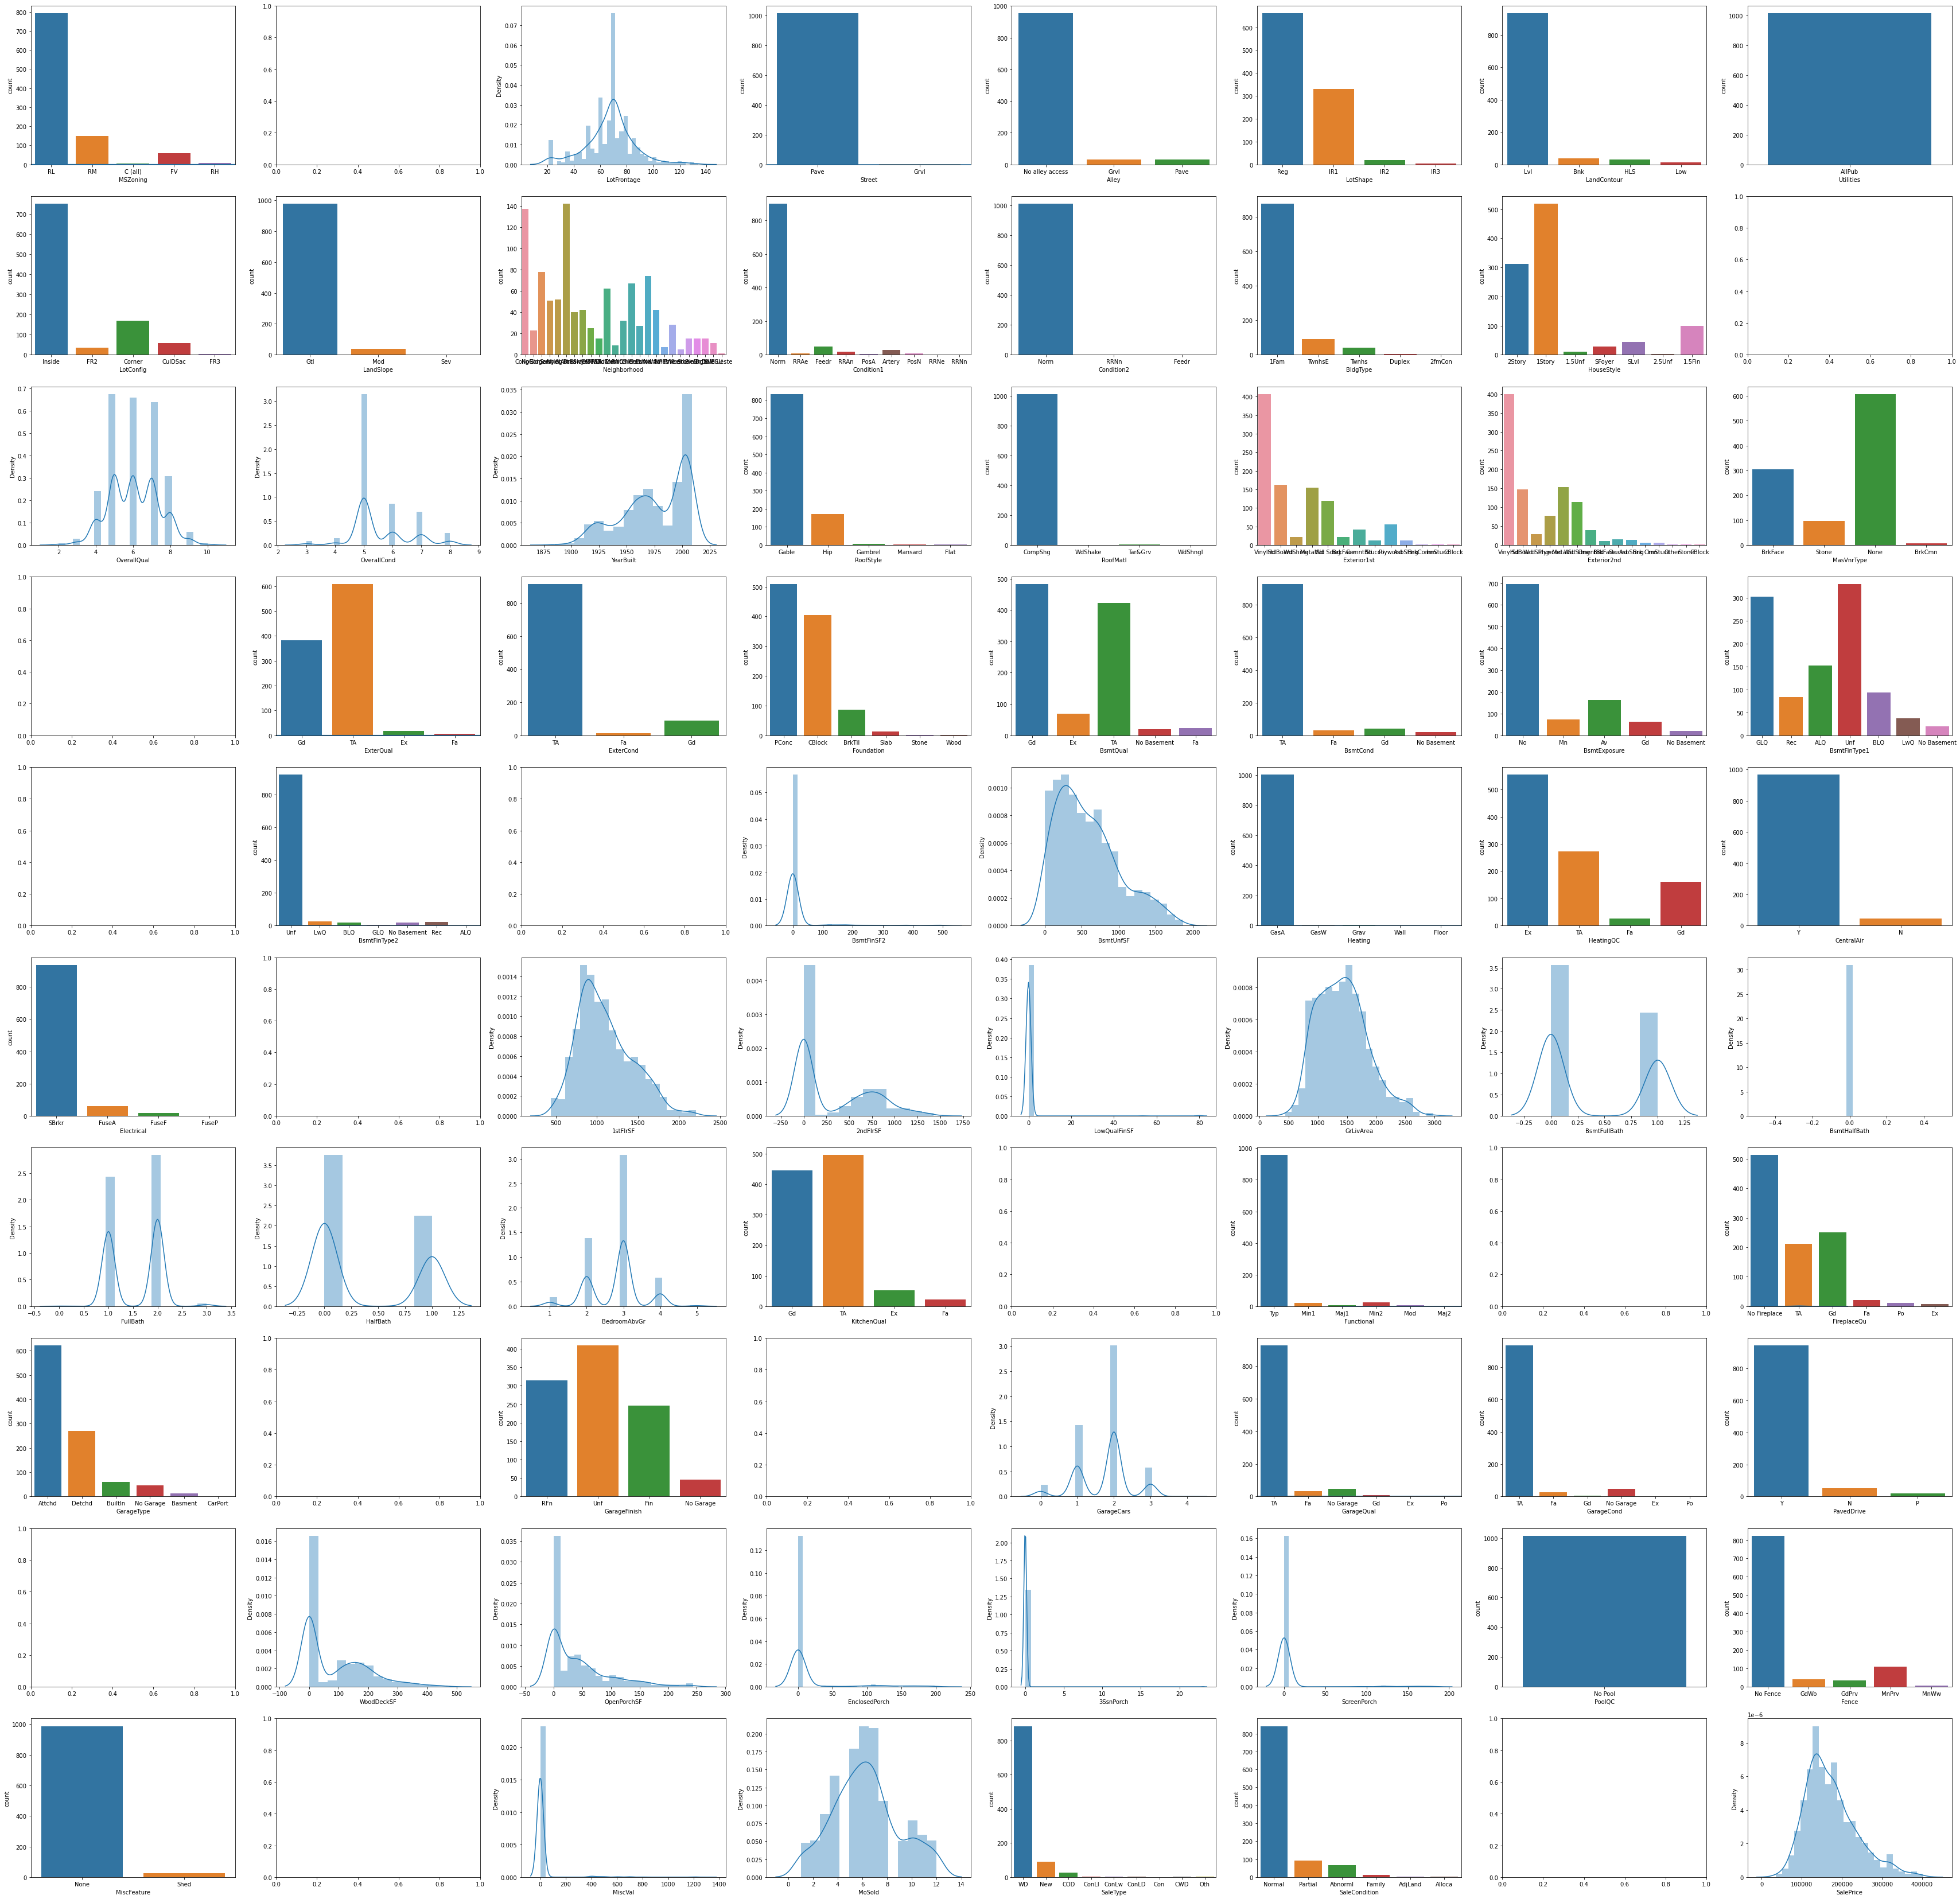

In [22]:
plt.figure(figsize=(60,60))
x=1
for i in train_df.columns:
    if (train_df[i].dtype!="object"):
        plt.subplot(10,8,x)
        sns.distplot(train_df[i])
        x=x+1
    else:
        sns.countplot(train_df[i])
        plt.subplot(10,8,x)
        x=x+1

In [23]:
train_df.corr()["SalePrice"].sort_values()

EnclosedPorch   -0.205026
OverallCond     -0.158932
BsmtFinSF2      -0.098253
MiscVal         -0.070746
MSSubClass      -0.037097
YrSold          -0.026457
LowQualFinSF    -0.020850
3SsnPorch       -0.001348
ScreenPorch      0.017633
MoSold           0.088510
BsmtUnfSF        0.219351
BsmtFullBath     0.231293
HalfBath         0.268377
BedroomAbvGr     0.276780
2ndFlrSF         0.318098
WoodDeckSF       0.330729
BsmtFinSF1       0.350999
LotArea          0.364850
LotFrontage      0.386450
OpenPorchSF      0.391954
MasVnrArea       0.415562
Fireplaces       0.436872
GarageYrBlt      0.556694
YearRemodAdd     0.566916
1stFlrSF         0.593348
TotRmsAbvGrd     0.594391
TotalBsmtSF      0.627239
YearBuilt        0.632075
FullBath         0.669794
GarageArea       0.670352
GarageCars       0.697028
GrLivArea        0.757007
OverallQual      0.813903
SalePrice        1.000000
BsmtHalfBath          NaN
KitchenAbvGr          NaN
PoolArea              NaN
Name: SalePrice, dtype: float64

In [24]:
train_df["BsmtHalfBath"].unique()

array([0], dtype=int64)

# Defining X and Y

In [25]:
X=train_df.drop(labels=["SalePrice"],axis=1)
Y=train_df[["SalePrice"]]

In [26]:
cat,con = catcon(X)

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X1=pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2=pd.get_dummies(X[cat])
Xnew=X1.join(X2)
X_new = Xnew

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

In [29]:
from statsmodels.api import add_constant
xconst=add_constant(xtrain)
from statsmodels.api import OLS
ols=OLS(ytrain,xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     55.07
Date:                Wed, 25 Jan 2023   Prob (F-statistic):          7.71e-297
Time:                        22:58:10   Log-Likelihood:                -8920.7
No. Observations:                 812   AIC:                         1.826e+04
Df Residuals:                     602   BIC:                         1.925e+04
Df Model:                         209                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
MSSubClass               -5545.1481   8930.639     -0.621      0.535   -2.31e+04     1.2e+04
LotFrontage               -675.6380   1020.956     -0.662      0.508   -2680.706    1329.430
LotArea                   4626.9317   1092.369      4.236      0.000    2481.615    6772.248
OverallQual               7468.7758   1419.400      5.262      0.000    4681.198    1.03e+04
OverallCond               5837.9517    980.704      5.953      0.000    3911.935    7763.968
YearBuilt                 1.217e+04   2802.673      4.343      0.000    6667.246    1.77e+04
YearRemodAdd              2190.7160   1308.862      1.674      0.095    -379.774    4761.206
MasVnrArea                 993.0530   1133.824      0.876      0.381   -1233.678    3219.784
BsmtFinSF1                6499.1614   1039.023      6.255      0.000    4458.610    8539.713
BsmtFinSF2                 937.1496   1354.934      0.692      0.489   -1723.821    3598.121
BsmtUnfSF                 -959.4460    920.991     -1.042      0.298   -2768.191     849.299
TotalBsmtSF               6318.1406   1603.662      3.940      0.000    3168.689    9467.592
1stFlrSF                  3888.1101   1719.628      2.261      0.024     510.911    7265.309
2ndFlrSF                  1.343e+04   1846.984      7.270      0.000    9800.047    1.71e+04
LowQualFinSF              -232.2936    610.317     -0.381      0.704   -1430.903     966.316
GrLivArea                 1.572e+04   1416.355     11.096      0.000    1.29e+04    1.85e+04
BsmtFullBath               725.6139   1014.052      0.716      0.475   -1265.896    2717.123
BsmtHalfBath              6.096e-11    7.4e-11      0.824      0.410   -8.43e-11    2.06e-10
FullBath                  -710.0414   1360.813     -0.522      0.602   -3382.559    1962.477
HalfBath                  -188.0646   1182.867     -0.159      0.874   -2511.113    2134.983
BedroomAbvGr              -413.0376   1169.308     -0.353      0.724   -2709.456    1883.381
KitchenAbvGr             -3.822e-11   7.95e-11     -0.481      0.631   -1.94e-10    1.18e-10
TotRmsAbvGrd                80.8076   1491.250      0.054      0.957   -2847.876    3009.491
Fireplaces                2135.2515   1833.620      1.165      0.245   -1465.817    5736.320
GarageYrBlt               -698.6373   1667.237     -0.419      0.675   -3972.944    2575.670
GarageCars                3103.7815   1704.279      1.821      0.069    -243.273    6450.836
GarageArea                2951.2507   1652.346      1.786      0.075    -293.812    6196.314
WoodDeckSF                3421.0074    751.914      4.550      0.000    1944.313    4897.702
OpenPorchSF               1499.0284    790.750      1.896      0.058     -53.935    3051.992
EnclosedPorch              708.2081    777.950      0.910      0.363    -819.618    2236.035
3SsnPorch     

In [30]:
ols.pvalues.sort_values()

GrLivArea                   3.698755e-26
2ndFlrSF                    1.122733e-12
BsmtFinSF1                  7.540098e-10
OverallCond                 4.478401e-09
Neighborhood_StoneBr        7.405716e-09
3SsnPorch                   1.103931e-08
Utilities_AllPub            1.103931e-08
PoolQC_No Pool              1.103931e-08
KitchenQual_Ex              1.125903e-07
OverallQual                 1.985073e-07
Functional_Typ              1.268035e-06
LandContour_HLS             1.565116e-06
ExterCond_TA                3.706453e-06
WoodDeckSF                  6.499211e-06
BsmtExposure_Gd             1.326082e-05
YearBuilt                   1.650597e-05
LotArea                     2.635327e-05
BsmtFinType1_GLQ            4.580064e-05
Neighborhood_Edwards        8.467501e-05
TotalBsmtSF                 9.109964e-05
Neighborhood_Crawfor        1.168170e-04
Neighborhood_NWAmes         9.992118e-04
Neighborhood_NridgHt        1.116197e-03
MasVnrType_Stone            1.974145e-03
PavedDrive_Y    

In [31]:
Q = ols.pvalues.sort_values()
col_to_drop = Q.index[-1]
col_to_drop

'SaleType_Con'

In [32]:
l1 = []
l2 = []
for i in range(Xnew.shape[1]-1):
    from sklearn.model_selection import train_test_split
    Xnew = Xnew.drop(labels=col_to_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
    from statsmodels.api import add_constant,OLS
    xconst = add_constant(xtrain,has_constant='add')
    ols = OLS(ytrain,xconst).fit()
    Q = ols.pvalues.sort_values()
    col_to_drop = Q.index[-1]
    l1.append(Xnew.columns)
    l2.append(ols.rsquared_adj)
A = pd.DataFrame(list(zip(l1, l2)),columns =['Name', 'val'])

In [33]:
A

,Name,val
0,"Index(['MSSubClass', 'LotFrontage', 'LotArea',...",0.935769
1,"Index(['MSSubClass', 'LotFrontage', 'LotArea',...",0.935769
2,"Index(['MSSubClass', 'LotFrontage', 'LotArea',...",0.935769
3,"Index(['MSSubClass', 'LotFrontage', 'LotArea',...",0.935875
4,"Index(['MSSubClass', 'LotFrontage', 'LotArea',...",0.935875
5,"Index(['MSSubClass', 'LotFrontage', 'LotArea',...",0.935875
6,"Index(['MSSubClass', 'LotFrontage', 'LotArea',...",0.935875
7,"Index(['MSSubClass', 'LotFrontage', 'LotArea',...",0.935981
8,"Index(['MSSubClass', 'LotFrontage', 'LotArea',...",0.935981
9,"Index(['MSSubClass', 'LotFrontage', 'LotArea',...",0.935981


In [34]:
l = list(A[A.val == max(A["val"])].values[0][0])
l

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BedroomAbvGr',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'MoSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'Neighborhood_Blmngtn',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_SWISU',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'BldgTy

In [35]:
A[A.val == max(A["val"])].values[0][1]

0.9413555852546146

In [36]:
X_new[l].shape

(1015, 113)

# Linear Regression

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(X_new[l],Y,test_size=0.2,random_state=21)

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_error = round(mean_absolute_error(ytrain,tr_pred))
ts_error = round(mean_absolute_error(ytest,ts_pred))

print(tr_error/1000,ts_error/1000)

9.997 403436787.519


# Ridge Regression(L2 Regularization)

In [39]:
x = 0.01
alphas = []
for i in range(0,1070,1):
    alphas.append(x)
    x = round(x + 0.01,2)

In [40]:
from sklearn.linear_model import Ridge
tr = []
ts = []
for i in alphas:
    rr = Ridge(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)

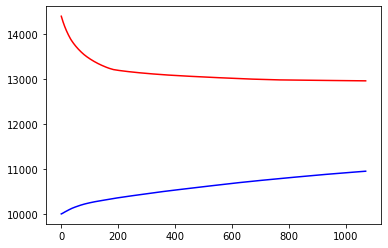

In [41]:
import matplotlib.pyplot as plt
plt.plot(tr,c="blue")
plt.plot(ts,c="red")

In [42]:
alphas[-1]

10.7

In [43]:
rr = Ridge(alpha=10.7)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(10948.581822846209, 12957.651744856032)

# Lasso Regression(L1 Regularization)

In [44]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=1)
model=ls.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(10001.838035470408, 14348.075540674217)

In [45]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.5)
model=ls.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(9998.900153416567, 14376.203885657671)

In [46]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=86)
model=ls.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(11029.142878610906, 12975.71647753706)

# Cross Validation

In [47]:
tuning_grid={"alpha":alphas}
rr=Ridge()
from sklearn.model_selection import GridSearchCV
cv1=GridSearchCV(rr,tuning_grid,scoring="neg_mean_squared_error",cv=10)
cvmodel = cv1.fit(Xnew,Y)
cvmodel.best_params_

{'alpha': 0.01}

In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_new[l],Y,test_size=0.2,random_state=31)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err,(abs(tr_err-ts_err))

(10686.077586206897, 11571.312192118226, 885.2346059113297)

In [49]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.01)
model = ls.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)
tr_err,ts_err,(abs(tr_err-ts_err))

(10686.166756061759, 11571.5051155275, 885.3383594657407)

In [50]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.01)
model=rr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err,(abs(tr_err-ts_err))

(10685.729828281053, 11561.826984982625, 876.0971567015713)

# Using Model For Test Data

In [51]:
cat,con = catcon(test_df)

In [52]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Y1=pd.DataFrame(ss.fit_transform(test_df[con]),columns=con)
Y2=pd.get_dummies(test_df[cat])
Xnew=Y1.join(Y2)

In [53]:
l

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BedroomAbvGr',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'MoSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'Neighborhood_Blmngtn',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_SWISU',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'BldgTy

In [54]:
Xnew=Xnew[l]

In [55]:
ts_pred=model.predict(Xnew)

In [56]:
df_final=test_df[["Id"]]

In [57]:
df_final["Predicted_Price"]=ts_pred

In [58]:
df_final

,Id,Predicted_Price
0,1461,125813.800183
1,1462,168585.089615
2,1463,186171.214671
3,1464,197199.952870
4,1465,208086.652475
...,...,...
1454,2915,86139.998569
1455,2916,77997.842952
1456,2917,175034.689472
1457,2918,123084.210271


In [59]:
df_final.to_csv("F:/ETL/Dataset/price_pred/Final_Solution.csv")